### 4. Aplicar los algoritmos necesarios para obtener en una imagen binaria, los detalles de las imágenes de monedas adjunta.

In [1]:
import numpy as np
import cv2 as cv
import matplotlib. pyplot as plt

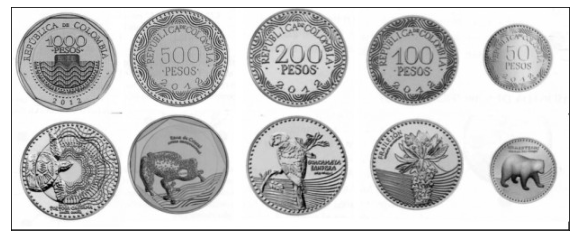

In [2]:
img = cv.imread('monedas.jpg',0)

plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray', vmin = 0, vmax=255)
plt.xticks([]), plt.yticks([]);

In [3]:
## Umbralización mediante método de umbral simple
umbral, imgBin = cv.threshold (img, 150,220, cv.THRESH_BINARY)

In [4]:
## Umbralización mediante filtro adaptativo gausiano
imgBin2 = cv.adaptiveThreshold (img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, \
            cv.THRESH_BINARY, 11,2)


In [5]:
## Umbralización mediante filtro adaptativo de media

imgBin3 = cv.adaptiveThreshold (img, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
            cv.THRESH_BINARY, 11,2)

In [6]:
## Umbralización mediante filtro adaptativo de media invertido

imgBin4 = cv.adaptiveThreshold (img, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
            cv.THRESH_BINARY_INV, 11,2)

Text(0.5, 1.0, 'Filtro adaptativo de media invertido')

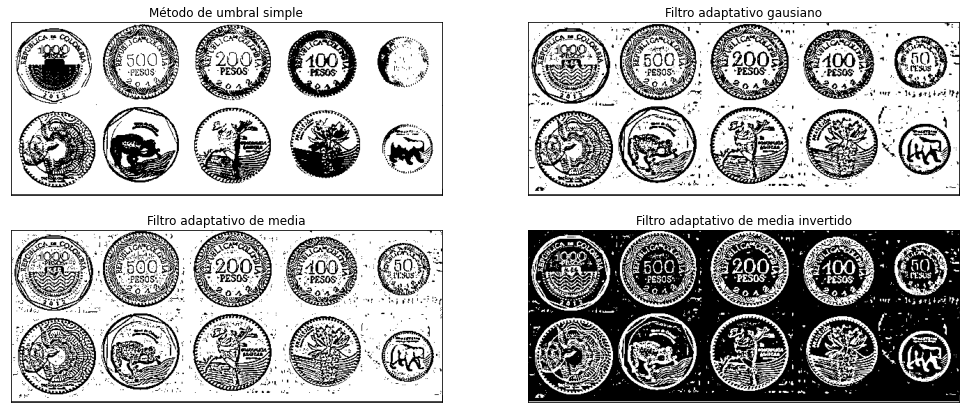

In [7]:
plt.figure(figsize=(17, 7))
plt.subplot(221)
plt.xticks([]),plt.yticks([])
plt.imshow(imgBin, cmap = 'gray')
plt.title('Método de umbral simple')
plt.subplot(222)
plt.xticks([]),plt.yticks([])
plt.imshow(imgBin3, cmap = 'gray')
plt.title('Filtro adaptativo gausiano')
plt.subplot(223)
plt.xticks([]),plt.yticks([])
plt.imshow(imgBin2, cmap = 'gray')
plt.title('Filtro adaptativo de media')
plt.subplot(224)
plt.xticks([]),plt.yticks([])
plt.imshow(imgBin4, cmap = 'gray')
plt.title('Filtro adaptativo de media invertido')

In [8]:
#Se aplica el operador gradiente
kernel = np.ones((2,2),np.uint8)
gradiente = cv.morphologyEx(imgBin, cv.MORPH_GRADIENT, kernel)

In [9]:
# Se crea una mascara de convolución
mask = np.array([[0, 1, 0],[1,-4,1],[0,1,0]])*(1/4)
# Se aplica filtrado de convolución
dst = cv.filter2D(img,-1,mask)

Text(0.5, 1.0, 'Gradiente')

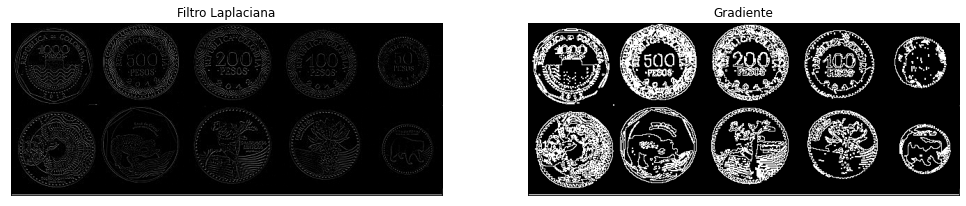

In [10]:
# Se visualizan los resultados
plt.figure(figsize=(17, 7))
plt.subplot(221)
plt.xticks([]),plt.yticks([])
plt.imshow(dst, cmap = 'gray')
plt.title('Filtro Laplaciana')
plt.subplot(222)
plt.xticks([]),plt.yticks([])
plt.imshow(gradiente, cmap = 'gray')
plt.title('Gradiente')